In [7]:
import numpy as np
import pandas as pd
import cv2
import os
from xml.etree import ElementTree
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models
keras = tf.keras

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [18]:
class_names =['person','person-like']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
n_classes = 2
size =(200,200)

In [19]:
def load_data():
  datasets = ['Train','Test','Val']
  output=[]
  for dataset in datasets:
    image=[]
    labels=[]
    directoryA='/content/gdrive/MyDrive/PedestrainDetection/' + dataset + '/Annotations'
    directoryIMG='/content/gdrive/MyDrive/PedestrainDetection/' + dataset + '/JPEGImages/'
    file=os.listdir(directoryA)
    img=os.listdir(directoryIMG)
    file.sort()
    img.sort()
    i=0
    for xml in file:
      xmlf=os.path.join(directoryA,xml)
      dom=ElementTree.parse(xmlf)
      vb=dom.findall('object')
      label=vb[0].find('name').text
      labels.append(class_names_label[label])

      img_path = directoryIMG + img[i]
      curr_img = cv2.imread(img_path)
      curr_img=cv2.resize(curr_img, size)
      image.append(curr_img)
      i +=1
    image = np.array(image, dtype='float32')
    image= image/255
    labels=np.array(labels,dtype='int32')
    output.append((image,labels))
  return output

In [20]:
(train_images,train_labels),(test_images,test_labels),(vla_images, val_labels)=load_data()

In [21]:
train_images.shape

(944, 200, 200, 3)

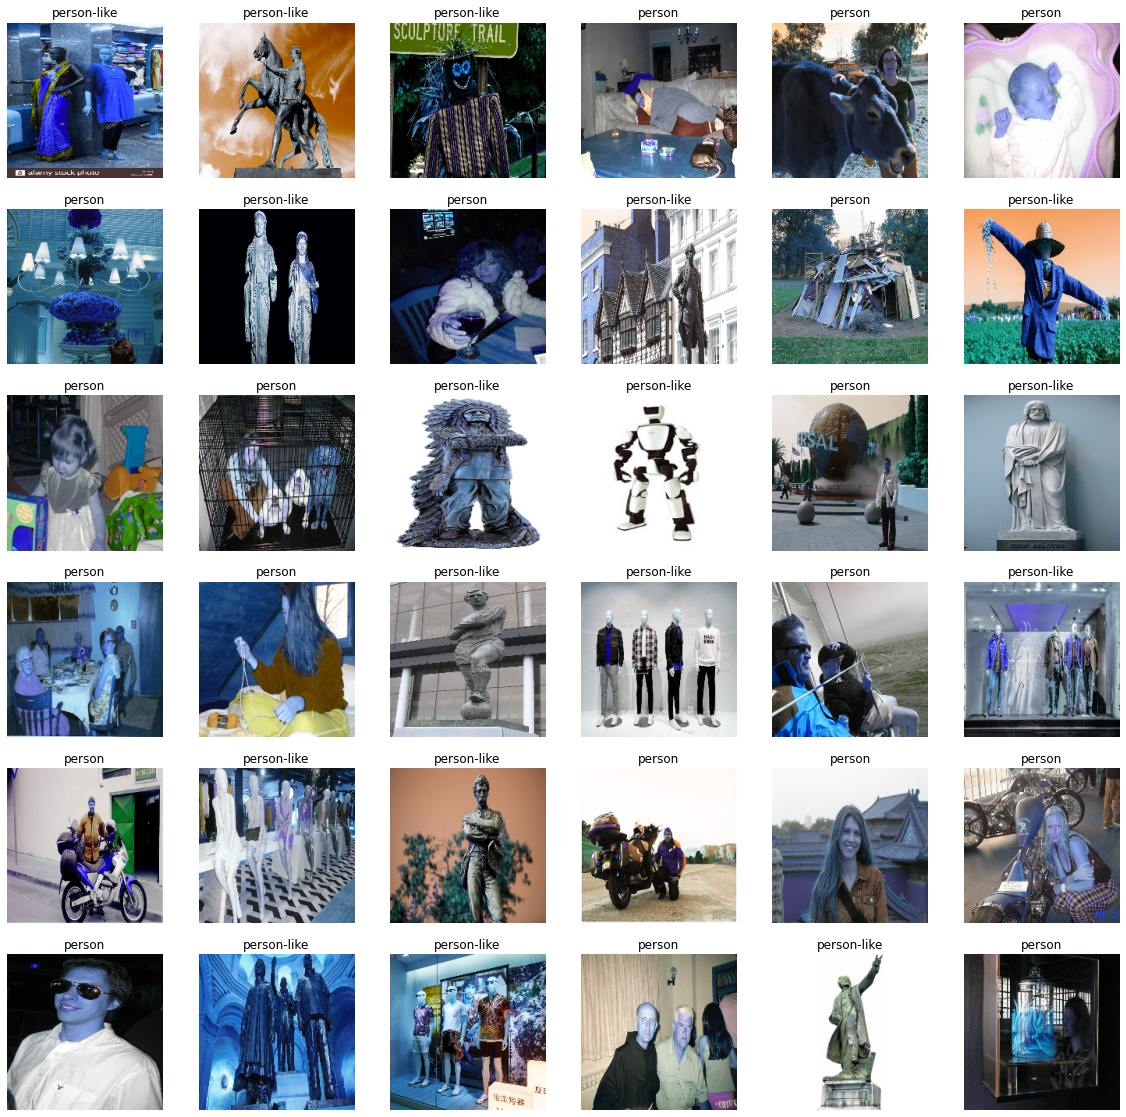

In [22]:
plt.figure(figsize=(20,20))
for n,i in enumerate(list(np.random.randint(0,len(train_images),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(train_images[i])
  plt.title(class_names[train_labels[i]])
  plt.axis('off')

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(16,(3,3), activation='relu', input_shape=(200,200,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [25]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2))

In [26]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [27]:
history=model.fit(train_images,train_labels,epochs=6, validation_data=(test_images,test_labels))

Epoch 1/6
30/30 [==============================] - 36s 1s/step - loss: 3.4931 - accuracy: 0.4910 - val_loss: 0.6823 - val_accuracy: 0.5787
Epoch 2/6
30/30 [==============================] - 34s 1s/step - loss: 0.6783 - accuracy: 0.6283 - val_loss: 0.6549 - val_accuracy: 0.5787
Epoch 3/6
30/30 [==============================] - 34s 1s/step - loss: 0.5938 - accuracy: 0.6885 - val_loss: 0.8873 - val_accuracy: 0.4894
Epoch 4/6
30/30 [==============================] - 34s 1s/step - loss: 0.5829 - accuracy: 0.7333 - val_loss: 0.6494 - val_accuracy: 0.6298
Epoch 5/6
30/30 [==============================] - 34s 1s/step - loss: 0.4453 - accuracy: 0.8116 - val_loss: 0.7915 - val_accuracy: 0.6638
Epoch 6/6
30/30 [==============================] - 34s 1s/step - loss: 0.2120 - accuracy: 0.9261 - val_loss: 0.7369 - val_accuracy: 0.6596


In [30]:
def plot_accuracy_loss(history):
  """
      Plot the accuracy and the loss during the training of the nn.
      """
  fig=plt.figure(figsize=(10,5))
  #plot accuracy
  plt.subplot(221)
  plt.plot(history.history['accuracy'], 'bo--',label='acc')
  plt.plot(history.history['val_accuracy'], 'ro--',label='val_acc')
  plt.title('train_acc vs val_acc')
  plt.ylabel('accuracy')
  plt.xlabel('epochs')
  plt.legend()
  # plot loss function
  plt.subplot(222)
  plt.plot(history.history['loss'],'bo--', label='loss')
  plt.plot(history.history['val_loss'],'ro--',label='val_loss')
  plt.title('train_loss vs val_loss')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend()
  plt.show()

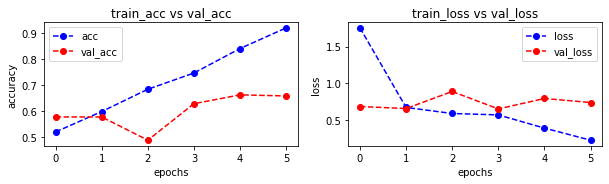

In [31]:
plot_accuracy_loss(history)

In [33]:
preds=model.predict(vla_images)

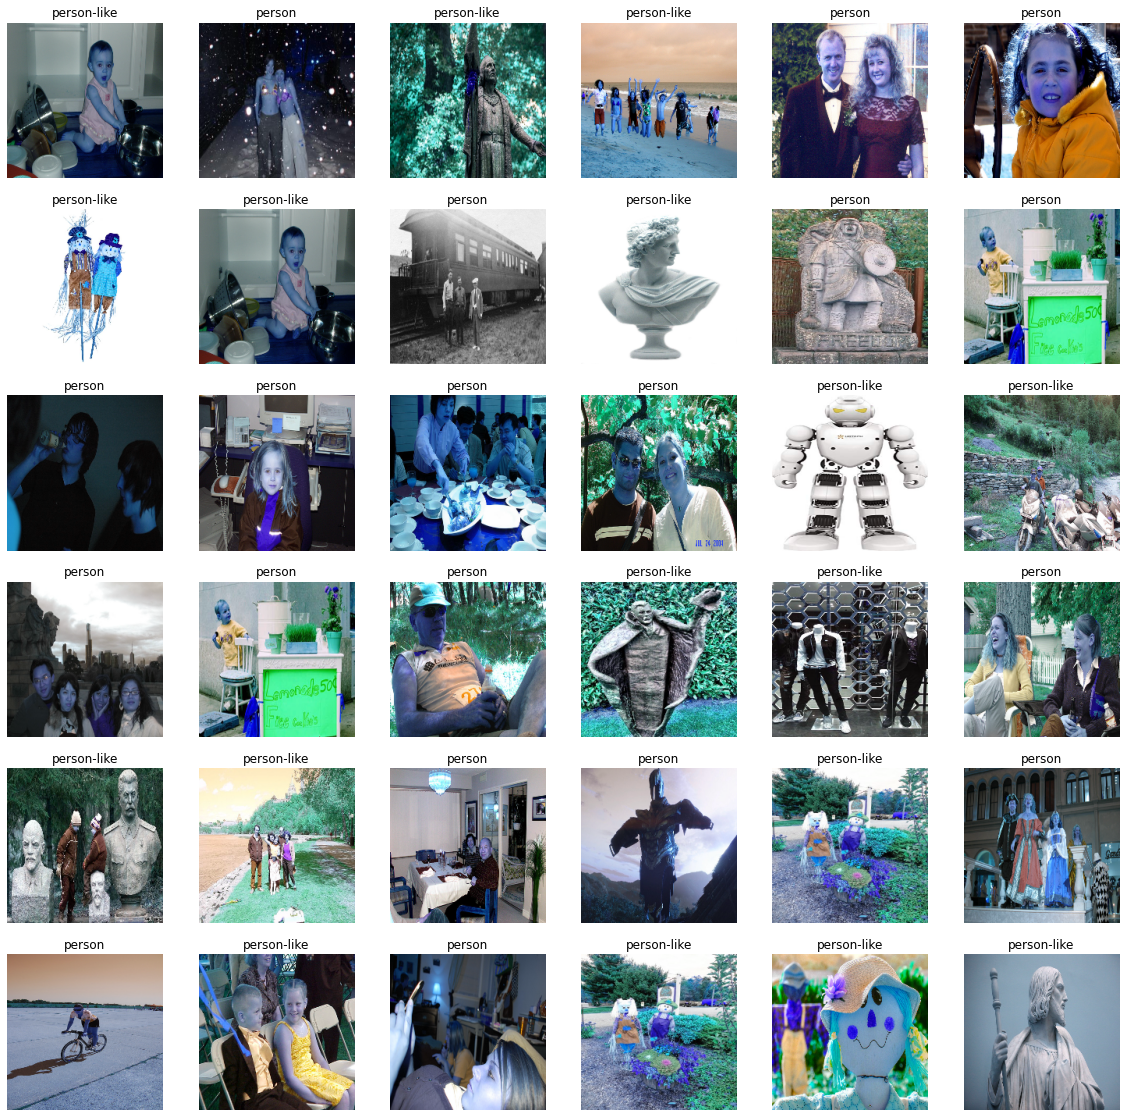

In [36]:
plt.figure(figsize=(20,20))
for n, i in enumerate(list(np.random.randint(0,len(vla_images),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(vla_images[i])
  plt.axis('off')
  x=np.argmax(preds[i])
  plt.title((class_names[x]))

In [37]:
result=[]
for i in range(len(preds)):
  result.append(np.argmax(preds[i]))

In [38]:
tn,fp,fn,tp = confusion_matrix(val_labels,result).ravel()

In [39]:
(tn,fp,fn,tp)

(58, 27, 18, 57)